/var/folders/b7/zsjw9l1579bg90by892m2zj00000gn/T/ipykernel_62227/2643301587.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Number of transactions: 18667
Number of distinct items: 20

Case a (Support=1.0%, Confidence=30.0%):
                                          antecedents  \
83  (JUMBO BAG PINK POLKADOT, JUMBO SHOPPER VINTAG...   
80  (JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)   
79  (JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)   
84  (JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...   
82  (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...   

                                          consequents   support  confidence  \
83  (JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)  0.014143    0.581498   
80  (JUMBO BAG PINK POLKADOT, JUMBO SHOPPER VINTAG...  0.014143    0.378223   
79  (JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...  0.014143    0.522772   
84  (JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)  0.014143    0.401826   
82  (JUMBO STORAGE BAG SUKI, JUMBO SHOPPER VINTAGE...  0.014143    0.336306   

         lift  
83  15.551317  
80  15.551317  
79  14.853257  
84  14.853257  
8

/Users/shriyog/.pyenv/versions/3.10.9/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/shriyog/.pyenv/versions/3.10.9/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/shriyog/.pyenv/versions/3.10.9/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


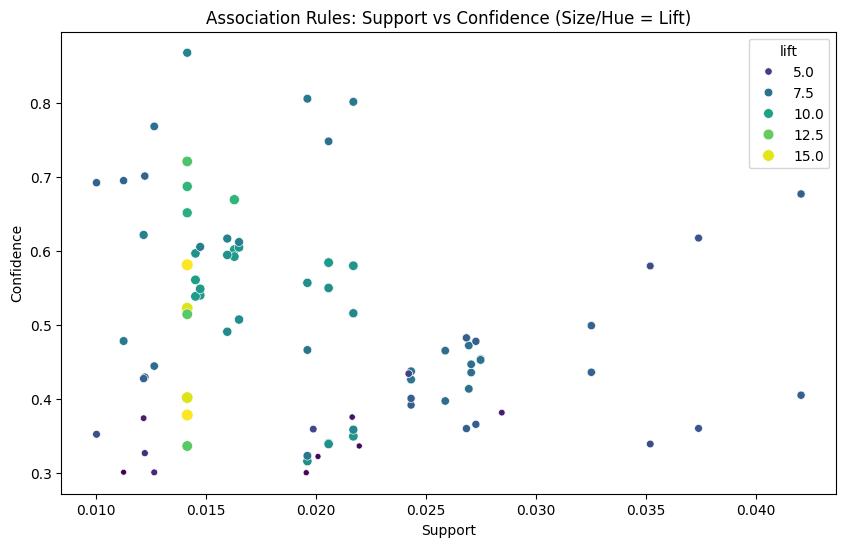

/var/folders/b7/zsjw9l1579bg90by892m2zj00000gn/T/ipykernel_62227/2643301587.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_rules['rule'] = top_10_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' + top_10_rules['consequents'].apply(lambda x: ', '.join(list(x)))
/var/folders/b7/zsjw9l1579bg90by892m2zj00000gn/T/ipykernel_62227/2643301587.py:112: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


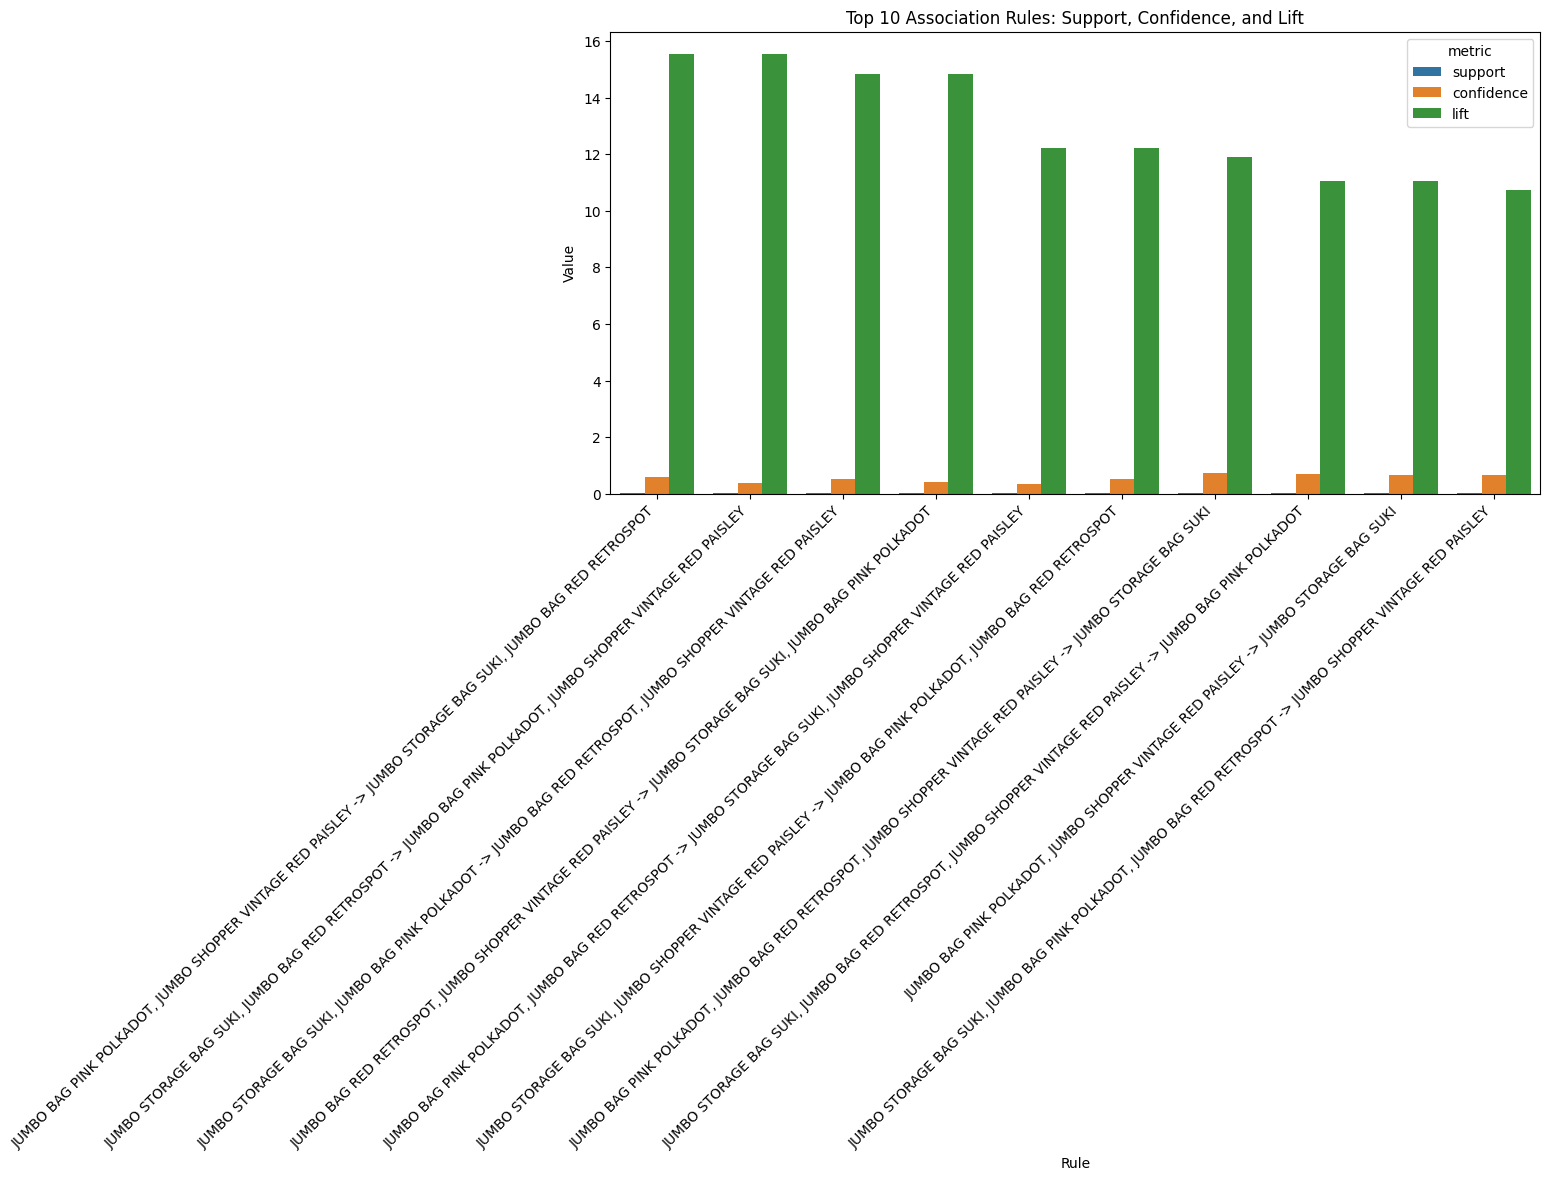


Case a (Support=1.0%, Confidence=30.0%, Min Length=5):
No rules found for this threshold with minimum length of 5.

Case b (Support=2.0%, Confidence=40.0%, Min Length=5):
No rules found for this threshold with minimum length of 5.

Case c (Support=3.0%, Confidence=50.0%, Min Length=5):
No rules found for this threshold with minimum length of 5.


/Users/shriyog/.pyenv/versions/3.10.9/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/shriyog/.pyenv/versions/3.10.9/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/shriyog/.pyenv/versions/3.10.9/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Load the dataset (two methods, one commented out)
# Method 1: Load from URL (commented out)
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
# df = pd.read_excel(url)

# Method 2: Load from local file (active)
# Adjust the file path if the file is not in your working directory
df = pd.read_excel("/Users/shriyog/Documents/SEM6/DMPM/LAB ESE/dataset/Online Retail Dataset.xlsx")

# Step 2: Preprocess the dataset
# Clean the data
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]  # Remove cancellations

# Filter for UK transactions
df = df[df['Country'] == 'United Kingdom']

# Group by InvoiceNo and create a list of items per transaction
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert quantities to binary (0 or 1)
def encode_units(x):
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)

# Select top 20 most frequent items to ensure at least 10 distinct items
item_frequency = basket_sets.sum().sort_values(ascending=False)
top_items = item_frequency.head(20).index
basket_sets = basket_sets[top_items]

# Ensure we have more than 500 transactions
print(f"Number of transactions: {basket_sets.shape[0]}")
print(f"Number of distinct items: {basket_sets.shape[1]}")

# Step 3: Apply Apriori algorithm for different thresholds
thresholds = [
    {'support': 0.01, 'confidence': 0.3, 'case': 'a'},
    {'support': 0.02, 'confidence': 0.4, 'case': 'b'},
    {'support': 0.03, 'confidence': 0.5, 'case': 'c'}
]

all_rules = []

for thresh in thresholds:
    support = thresh['support']
    confidence = thresh['confidence']
    case = thresh['case']

    # Apply Apriori algorithm
    frequent_itemsets = apriori(basket_sets, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    rules = rules.sort_values(by='lift', ascending=False)

    # Store rules for later
    rules['case'] = case
    all_rules.append(rules)

    # Display first 5 rules
    print(f"\nCase {case} (Support={support*100}%, Confidence={confidence*100}%):")
    if len(rules) > 0:
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))
    else:
        print("No rules found for this threshold.")

# Step 4: Combine all rules, sort by lift, and display top 5
combined_rules = pd.concat(all_rules, ignore_index=True)
combined_rules = combined_rules.sort_values(by='lift', ascending=False)
print("\nTop 5 rules sorted by lift (across all cases):")
print(combined_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'case']].head(5))

# Step 5: Interpret confidence of 2 rules
# Select the top 2 rules by lift for interpretation
top_2_rules = combined_rules.head(2)
print("\nInterpretation of Confidence for Top 2 Rules by Lift:")
for idx, rule in top_2_rules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    confidence = rule['confidence']
    print(f"Rule: {antecedents} -> {consequents}")
    print(f"Confidence: {confidence:.2%}")
    print(f"Interpretation: When {antecedents} are purchased, there is a {confidence:.2%} chance that {consequents} will also be purchased.\n")

# Step 6: Plot the rules (Scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis')
plt.title('Association Rules: Support vs Confidence (Size/Hue = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Step 7: Plot the rules using group method (grouped bar plot for top 10 rules)
top_10_rules = combined_rules.head(10)
top_10_rules['rule'] = top_10_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' + top_10_rules['consequents'].apply(lambda x: ', '.join(list(x)))
plt.figure(figsize=(12, 6))
sns.barplot(x='rule', y='value', hue='metric',
            data=pd.melt(top_10_rules, id_vars=['rule'], value_vars=['support', 'confidence', 'lift'], var_name='metric'))
plt.title('Top 10 Association Rules: Support, Confidence, and Lift')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Rule')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Step 8: Apply minimum length of 5 and display first 5 rules for each case
for thresh in thresholds:
    support = thresh['support']
    confidence = thresh['confidence']
    case = thresh['case']

    # Apply Apriori with min_length (antecedents + consequents >= 5)
    frequent_itemsets = apriori(basket_sets, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    # Filter for rules with total length >= 5
    rules['length'] = rules['antecedents'].apply(len) + rules['consequents'].apply(len)
    rules = rules[rules['length'] >= 5]
    rules = rules.sort_values(by='lift', ascending=False)

    # Display first 5 rules
    print(f"\nCase {case} (Support={support*100}%, Confidence={confidence*100}%, Min Length=5):")
    if len(rules) > 0:
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))
    else:
        print("No rules found for this threshold with minimum length of 5.")